[INFO] Dataset Loaded Successfully
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

[INFO] Dataset Summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369

/tmp/ipython-input-210411996.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome", data=df, palette="Set2")


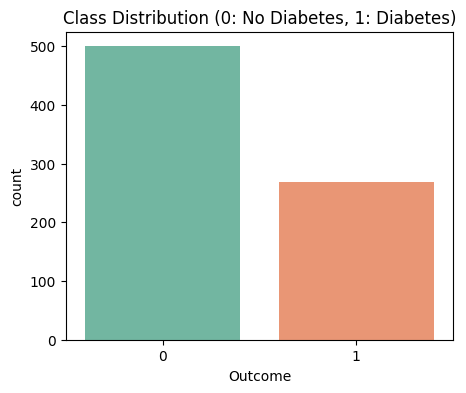

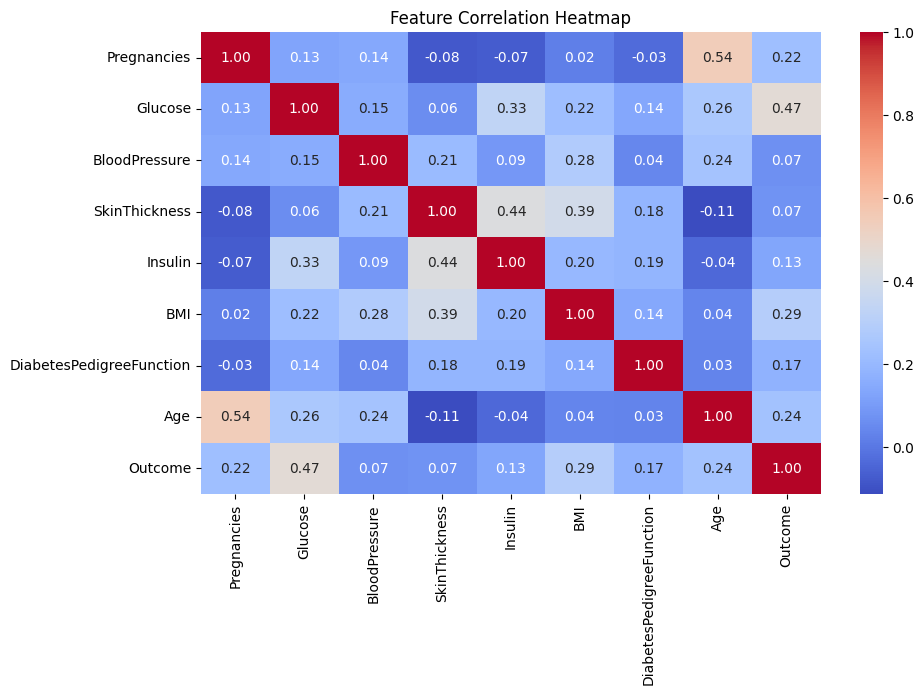

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6421 - loss: 0.6407 - val_accuracy: 0.6688 - val_loss: 0.6230
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6886 - loss: 0.6165 - val_accuracy: 0.6948 - val_loss: 0.5876
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7129 - loss: 0.5959 - val_accuracy: 0.7013 - val_loss: 0.5635
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7674 - loss: 0.5305 - val_accuracy: 0.7208 - val_loss: 0.5469
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7715 - loss: 0.5284 - val_accuracy: 0.7338 - val_loss: 0.5332
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7738 - loss: 0.5014 - val_accuracy: 0.7403 - val_loss: 0.5211
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7398 - loss: 0.5120 - val_accuracy: 0.7403 - val_loss: 0.5174
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7326 - loss: 0.5352 - val_accuracy: 0.7468 - val_loss: 0.

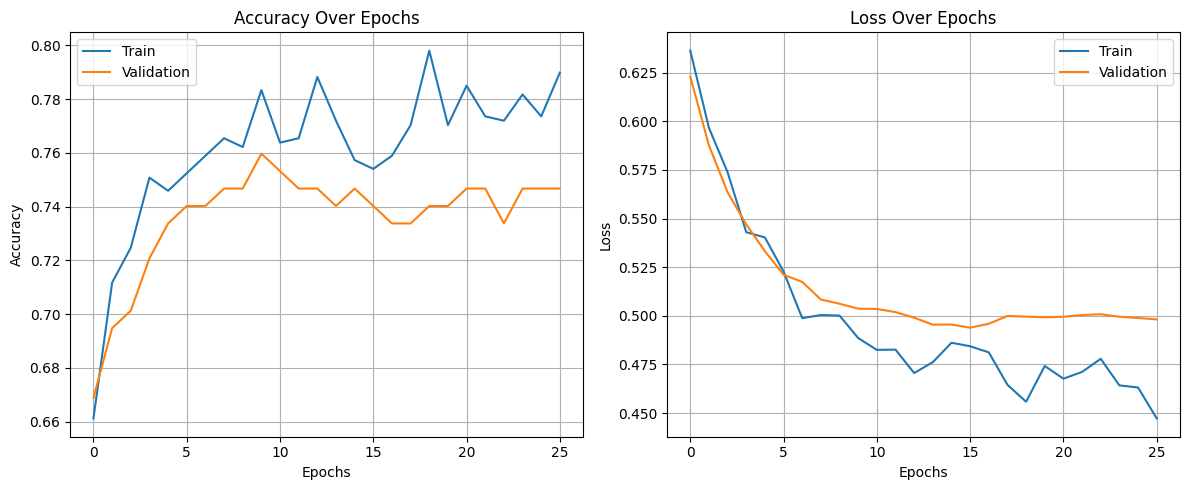

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


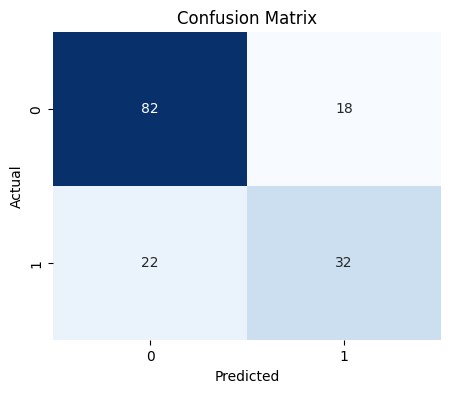

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


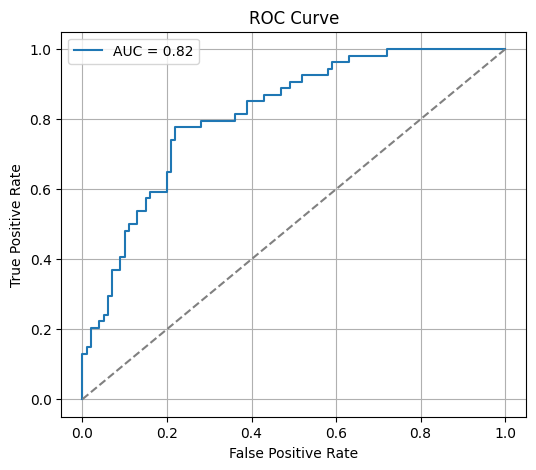

ExactExplainer explainer: 615it [00:12,  9.11it/s]                         


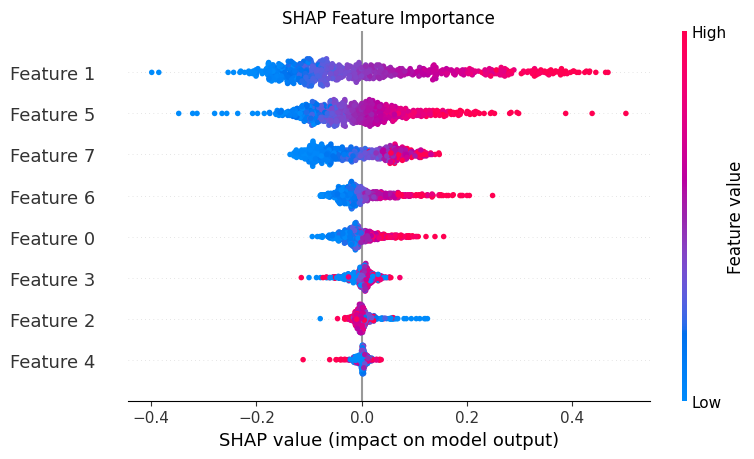

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



[INFO] Prediction for sample patient: Diabetes
[INFO] Model saved as diabetes_model_full.h5


In [7]:
# ==============================
# Diabetes Prediction - Full Project with Explainability
# Internship Project - Slash Mark
# ==============================

import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ==== 1. LOAD & INSPECT DATA ====
DATA_FILE = "Book 3.xlsx"
df = pd.read_excel(DATA_FILE)

print("[INFO] Dataset Loaded Successfully")
print(df.head())
print("\n[INFO] Dataset Summary:")
print(df.describe())
print("\n[INFO] Class Distribution:")
print(df["Outcome"].value_counts())

# ==== 2. DATA VISUALIZATION ====

# Class distribution
plt.figure(figsize=(5,4))
sns.countplot(x="Outcome", data=df, palette="Set2")
plt.title("Class Distribution (0: No Diabetes, 1: Diabetes)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# ==== 3. FEATURE & TARGET SPLIT ====
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# ==== 4. TRAIN-TEST SPLIT ====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==== 5. FEATURE SCALING ====
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==== 6. BUILD NEURAL NETWORK ====
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ==== 7. TRAIN MODEL ====
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

# ==== 8. EVALUATE MODEL ====
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"[RESULT] Test Accuracy: {accuracy*100:.2f}%")

# ==== 9. TRAINING CURVES ====
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ==== 10. CONFUSION MATRIX ====
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ==== 11. ROC CURVE ====
y_pred_prob = model.predict(X_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# ==== 12. SHAP FEATURE IMPORTANCE ====
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

plt.title("SHAP Feature Importance")
# Corrected: Use X_train for the summary_plot as shap_values were calculated using X_train
shap.summary_plot(shap_values, X_train, show=True)

# ==== 13. PREDICTION FUNCTION ====
def predict_new_patient(data):
    data_scaled = scaler.transform([data])
    prediction = (model.predict(data_scaled) > 0.5).astype("int32")[0][0]
    return "Diabetes" if prediction == 1 else "No Diabetes"

# Example usage
sample_patient = X.iloc[0].values
print(f"\n[INFO] Prediction for sample patient: {predict_new_patient(sample_patient)}")

# ==== 14. SAVE MODEL ====
model.save("diabetes_model_full.h5")
print("[INFO] Model saved as diabetes_model_full.h5")